# Multiplicación de matrices cuadradas de tamaño nxn A*B = C

Imports y Class Counter

In [1]:
import random
import pylab 
import math
import numpy as np

class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
    

# 1. Algoritmo de multiplicación de matrices en tiempo O(n^3) que calcula cada elemento de la matriz C como c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj}

In [2]:
def mult_matrices(A,B, n, acct):
    m=int(n)
    a=list(A); acct.count()
    b=list(B); acct.count()
    S = np.zeros((m,m,)); acct.count()
    for i in range(m):
        acct.count()
        for j in range(m):
            acct.count()
            for k in range(m):
                acct.count()
                S[i][j]=S[i][j]+(a[i][k]*b[k][j]);acct.count();acct.count()
    return S

<h3>Ejemplo con matriz de 5x5:</h3>

In [3]:
i=5
acct = Counter()
A =np.random.randint(40, size=(i, i))
np.random.shuffle(A)
B = np.random.randint(40, size=(i, i))
np.random.shuffle(B)
print ('Matriz A: ')
print (A)
print ('Matriz B: ')
print (B)
print ('Resultado de la multiplicación: ')
print (mult_matrices(A,B,i,acct))

Matriz A: 
[[11 16 31  6 31]
 [22  3  7  4 32]
 [19 36 12 34 32]
 [22 21  9 13 29]
 [ 3 33 35 31 13]]
Matriz B: 
[[25 18 21 23 33]
 [ 8 38 26 24 29]
 [22 21 21  1 28]
 [14 22  8 22 14]
 [14  2 31 34  3]]
Resultado de la multiplicación: 
[[ 1603.  1651.  2307.  1854.  1872.]
 [ 1232.   809.  1711.  1761.  1161.]
 [ 1951.  2774.  2851.  3149.  2579.]
 [ 1504.  1727.  2200.  2291.  1856.]
 [ 1725.  2751.  2307.  2020.  2509.]]


<h3> Análisis del tiempo de ejecución</h3>

In [4]:
def exper_analysis_1(n):
    results = []
    
    for i in range(2,n):
        acct = Counter()
        A =np.random.randint(40, size=(i, i))
        np.random.shuffle(A)
        B = np.random.randint(40, size=(i, i))
        np.random.shuffle(B)
        mult_matrices(A,B,i,acct)
        results.append(acct.steps)
    return results

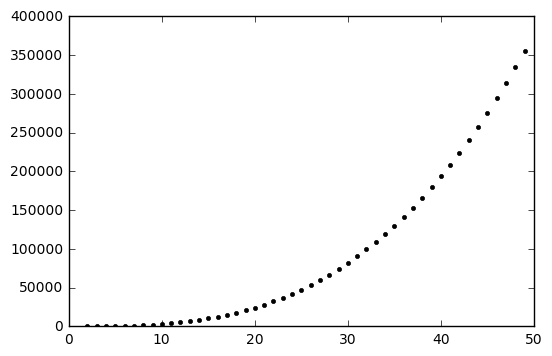

In [5]:
pylab.clf()
x = np.arange(2,50)
y = np.array(exper_analysis_1(50))

pylab.plot(x, y, 'k.')
pylab.show()

# 2. Algoritmo de multiplicación de matrices basado en una estrategía de multiplicación de matrices en tiempo O(n^3) donde cada matriz es dividida en 4 partes iguales.

In [16]:
def multi_div_4(A,B,i,acct):
    x=list(A); acct.count()
    y=list(B); acct.count()
    tam_inicial=i; acct.count()
    
    if i%2!=0:
        acct.count()
        aux_a = np.zeros((i+1,i+1)); acct.count()
        aux_a[:-1,:-1] = A; acct.count()
        A=aux_a; acct.count()
        aux_b = np.zeros((i+1,i+1)); acct.count()
        aux_b[:-1,:-1] = B; acct.count()
        B=aux_b; acct.count()
        i+=1; acct.count()
        
    n=int(i/2); acct.count()
    
    a=A[0:n,0:n]; acct.count()
    b=A[0:n,n:i]; acct.count()
    c=A[n:i,0:n]; acct.count()
    d=A[n:i,n:i]; acct.count()
    
    e=B[0:n,0:n]; acct.count()
    f=B[0:n,n:i]; acct.count()
    g=B[n:i,0:n]; acct.count()
    h=B[n:i,n:i]; acct.count()
    
    if n>2:
        acct.count()
        ae=multi_div_4(a,e,n,acct); acct.count()
        bg=multi_div_4(b,g,n,acct); acct.count()
        af=multi_div_4(a,f,n,acct); acct.count()
        bh=multi_div_4(b,h,n,acct); acct.count()
        ce=multi_div_4(c,e,n,acct); acct.count()
        dg=multi_div_4(d,g,n,acct); acct.count()
        cf=multi_div_4(c,f,n,acct); acct.count()
        dh=multi_div_4(d,h,n,acct); acct.count()

        
    else:
        ae=mult_matrices(a,e,n,acct); acct.count()
        bg=mult_matrices(b,g,n,acct); acct.count()
        af=mult_matrices(a,f,n,acct); acct.count()
        bh=mult_matrices(b,h,n,acct); acct.count()
        ce=mult_matrices(c,e,n,acct); acct.count()
        dg=mult_matrices(d,g,n,acct); acct.count()
        cf=mult_matrices(c,f,n,acct); acct.count()
        dh=mult_matrices(d,h,n,acct); acct.count()
        
    primer=sumar_matrices(ae,bg,n,acct); acct.count()
    segundo=sumar_matrices(af,bh,n,acct); acct.count()
    tercer=sumar_matrices(ce,dg,n,acct); acct.count()
    cuarto=sumar_matrices(cf,dh,n,acct); acct.count()

    resultado=(np.concatenate(((np.concatenate((primer, segundo),axis=1)),(np.concatenate((tercer, cuarto),axis=1))),axis=0)); acct.count() 
    if tam_inicial%2!=0:
        acct.count()
        resultado=resultado[0:tam_inicial,0:tam_inicial]; acct.count()
    return resultado  

def sumar_matrices(a,b,n,acct):
    result=np.zeros((n,n,));acct.count()
    for i in range(n):
        acct.count()
        for j in range(n):
            acct.count()
            result[i][j]=a[i][j]+b[i][j]; acct.count()
    return result

<h3>Ejemplo con matriz de 5x5:</h3>

In [17]:
i=5
acct = Counter()
A =np.random.randint(40, size=(i, i))
np.random.shuffle(A)
B = np.random.randint(40, size=(i, i))
np.random.shuffle(B)
print ('Matriz A: ')
print (A)
print ('Matriz B: ')
print (B)
print ('Resultado de la multiplicación: ')
print (multi_div_4(A,B,i,acct))

Matriz A: 
[[27 28 13  8 28]
 [ 9 20 38 18 14]
 [13 27  9 22 27]
 [ 8 24 38 27 11]
 [ 3  6 31  9 29]]
Matriz B: 
[[ 0 11  5  1 27]
 [32  5 39 26  3]
 [26  4 34 17 30]
 [39 35 30 33 39]
 [32 18 28 36 17]]
Resultado de la multiplicación: 
[[ 2442.  1273.  2693.  2248.  1991.]
 [ 2778.  1233.  3049.  2273.  2383.]
 [ 2820.  1570.  2840.  2566.  2019.]
 [ 3161.  1503.  3386.  2565.  2668.]
 [ 2277.  1024.  2385.  2027.  1873.]]


<h3> Análisis del tiempo de ejecución</h3>

In [8]:
def exper_analysis_2(n):
    results = []
    for i in range(2,n):
        acct = Counter()
        A =np.random.randint(3, size=(i, i))
        np.random.shuffle(A)
        B = np.random.randint(3, size=(i, i))
        np.random.shuffle(B)
        multi_div_4(A,B,i,acct)
        results.append(acct.steps)
    return results

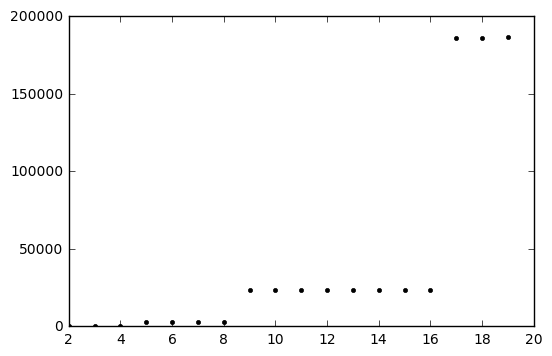

In [9]:
pylab.clf()
x = np.arange(2,20)
y = np.array(exper_analysis_2(20))

pylab.plot(x, y, 'k.')
pylab.show()

# 3. Algoritmo de Strassen

In [10]:
def strassen(A,B,i,acct):
    x=list(A); acct.count()
    y=list(B); acct.count()
    tam_inicial=i; acct.count()
    
    if i%2!=0:
        acct.count()
        aux_a = np.zeros((i+1,i+1)); acct.count()
        aux_a[:-1,:-1] = A; acct.count()
        A=aux_a; acct.count()
        aux_b = np.zeros((i+1,i+1)); acct.count()
        aux_b[:-1,:-1] = B; acct.count()
        B=aux_b; acct.count()
        i+=1; acct.count()
        
    n=int(i/2); acct.count()
    
    a=A[0:n,0:n]; acct.count()
    b=A[0:n,n:i]; acct.count()
    c=A[n:i,0:n]; acct.count()
    d=A[n:i,n:i]; acct.count()
    
    e=B[0:n,0:n]; acct.count()
    f=B[0:n,n:i]; acct.count()
    g=B[n:i,0:n]; acct.count()
    h=B[n:i,n:i]; acct.count()
    
    FH=restar_matrices(f,h,n,acct)
    AB=sumar_matrices(a,b,n,acct)
    CD=sumar_matrices(c,d,n,acct)
    GE=restar_matrices(g,e,n,acct)
    AD=sumar_matrices(a,d,n,acct)
    EH=sumar_matrices(e,h,n,acct)
    BD=restar_matrices(b,d,n,acct)
    GH=sumar_matrices(g,h,n,acct)
    AC=restar_matrices(a,c,n,acct)
    EF=sumar_matrices(e,f,n,acct)
    
    if n>2:
        p1=strassen(a,FH,n,acct); acct.count()
        p2=strassen(AB,h,n,acct); acct.count()
        p3=strassen(CD,e,n,acct); acct.count()
        p4=strassen(d,GE,n,acct); acct.count()
        p5=strassen(AD,EH,n,acct); acct.count()
        p6=strassen(BD,GH,n,acct); acct.count()
        p7=strassen(AC,EF,n,acct); acct.count()

    else:
        p1=mult_matrices(a,FH,n,acct); acct.count()
        p2=mult_matrices(AB,h,n,acct); acct.count()
        p3=mult_matrices(CD,e,n,acct); acct.count()
        p4=mult_matrices(d,GE,n,acct); acct.count()
        p5=mult_matrices(AD,EH,n,acct); acct.count()
        p6=mult_matrices(BD,GH,n,acct); acct.count()
        p7=mult_matrices(AC,EF,n,acct); acct.count()

    p5p4=sumar_matrices(p5,p4,n,acct); acct.count()
    p5p4p2=restar_matrices(p5p4,p2,n,acct); acct.count()
    primer=sumar_matrices(p5p4p2,p6,n,acct); acct.count()
    segundo=sumar_matrices(p1,p2,n,acct); acct.count()
    tercer=sumar_matrices(p3,p4,n,acct); acct.count()
    p1p5=sumar_matrices(p1,p5,n,acct); acct.count()
    p1p5p3=restar_matrices(p1p5,p3,n,acct);acct.count()
    cuarto=restar_matrices(p1p5p3,p7,n,acct);acct.count()
    
    resultado=(np.concatenate(((np.concatenate((primer, segundo),axis=1)),(np.concatenate((tercer, cuarto),axis=1))),axis=0)); acct.count() 
    if tam_inicial%2!=0:
        acct.count()
        resultado=resultado[0:tam_inicial,0:tam_inicial]; acct.count()

    return resultado  

def sumar_matrices(a,b,n,acct):
    result=np.zeros((n,n,));acct.count()
    for i in range(n):
        acct.count()
        for j in range(n):
            acct.count()
            result[i][j]=a[i][j]+b[i][j]; acct.count()
    return result

def restar_matrices(a,b,n,acct):
    result=np.zeros((n,n,));acct.count()
    for i in range(n):
        acct.count()
        for j in range(n):
            acct.count()
            result[i][j]=a[i][j]-b[i][j]; acct.count()
    return result

<h3>Ejemplo con matriz de 5x5:</h3>

In [11]:
i=5
acct = Counter()
A =np.random.randint(40, size=(i, i))
np.random.shuffle(A)
B = np.random.randint(40, size=(i, i))
np.random.shuffle(B)
print ('Matriz A: ')
print (A)
print ('Matriz B: ')
print (B)
print ('Resultado de la multiplicación: ')
print (strassen(A,B,i,acct))

Matriz A: 
[[18 29 39 33 28]
 [16 16  5 17  5]
 [ 3 37 13  0  4]
 [23  9  5 37 20]
 [38 32 23 22 22]]
Matriz B: 
[[15 12 29 22 19]
 [ 4  1  5 39 19]
 [26 22 33 31  5]
 [23 28 18 32 30]
 [26  7  4 10 31]]
Resultado de la multiplicación: 
[[ 2887.  2223.  2660.  4072.  2946.]
 [  955.   829.  1035.  1725.  1298.]
 [  635.   387.   717.  1952.   949.]
 [ 1882.  1571.  1623.  2396.  2363.]
 [ 2374.  1764.  2505.  3721.  2787.]]


In [12]:
def exper_analysis_3(n):
    results = []
    for i in range(2,n):
        acct = Counter()
        A =np.random.randint(3, size=(i, i))
        np.random.shuffle(A)
        B = np.random.randint(3, size=(i, i))
        np.random.shuffle(B)
        strassen(A,B,i,acct)
        results.append(acct.steps)
    return results

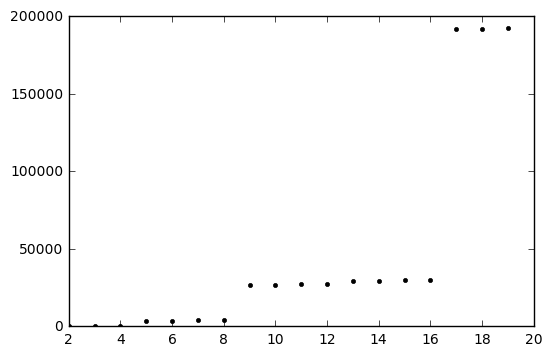

In [13]:
import pylab 
import math
pylab.clf()
x = np.arange(2,20)
y = np.array(exper_analysis_3(20))

pylab.plot(x, y, 'k.')
pylab.show()

# Comparación de los tres algoritmos
Rojo: multiplicación de matrices en tiempo O(n^3) que calcule cada elemento de la matriz C como c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj} <br>
Azul: multiplicación de matrices basado en una estrategía de multiplicación de matrices en tiempo O(n^3) donde cada matriz es dividida en 4 partes iguales<br>
Negro: algoritmo de Strassen

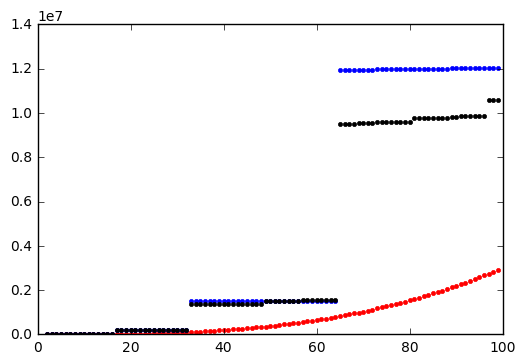

In [14]:
pylab.clf()
x = np.arange(2,100)
y = np.array(exper_analysis_1(100))

a = np.arange(2,100)
b = np.array(exper_analysis_2(100))

c = np.arange(2,100)
d = np.array(exper_analysis_3(100))

pylab.plot(x, y, 'r.',a,b,'b.',c,d,'k.')
pylab.show()